# Project: Investigate European Soccer Database

Created by Yuhong on 7th-Jun-2019

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This datasource is from [Kaggle-European Soccer Database](https://www.kaggle.com/hugomathien/soccer). It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

>The data consists of following:
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The original data source is provided in sqlite. I have downloaded the data in csv files before analysis.

> The project aims to discover following questions:
- Which team has the biggest performance change over the time period? 
- Which players had the most penalties? 
- Among three personality attributes: potential,stamina,agreesion, which player attributes lead to the hgiher overall rating? 


In [1]:
# import packages that will be used in this project.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

% matplotlib inline
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

# load in country data
df_country=pd.read_csv('country.csv')
df_country.head(1)

,id,name
0,1,Belgium


In [3]:
# load in league data
df_league=pd.read_csv('league.csv')
df_league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [4]:
# load in match data
df_match=pd.read_csv('match.csv')
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [5]:
# load in player data
df_player=pd.read_csv('player.csv')
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [6]:
# load in player attribute data
df_player_att=pd.read_csv('player_attributes.csv')
df_player_att.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [7]:
# load in sqlite sequence data
df_sqlite_seq=pd.read_csv('sqlite_sequence.csv')
df_sqlite_seq.head(1)

,name,seq
0,Team,103916


In [8]:
# load in team data
df_team=pd.read_csv('team.csv')
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [9]:
# load in team attributes data
df_team_att=pd.read_csv('team_attributes.csv')
df_team_att.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


### Data Cleaning

To answer the three question, we will use different data sets for investigation. to begin with, I will clean the data first
1. Which team has the biggest performance change over the time period?
> match dataset, team dataset
2.  Which players had the most penalties?
> player attribute dataset, and player dataset
3. Among three personality attributes: potential,stamina,agreesion, which player attributes lead to the hgiher overall rating?
> player attribute dataset, player dataset


In [10]:
# check match dataset
df_match.shape

(25979, 115)

In [11]:
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [12]:
# Explore match data set to check whether duplicate matches in dataset 
sum(df_match['match_api_id'].duplicated())

0

In [13]:
# drop unwanted columns, then check missing data

#drop unwanted columns
df_match=df_match.loc[:,('id','country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id','home_team_goal','away_team_goal')]
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1


In [14]:
# checking if there is missing data
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [15]:
# clean player dataset
df_player_att.shape

(183978, 42)

In [16]:
df_player_att.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [17]:
# in this investigation, we will look into penalties, overall_rating, potential, stamina, agreesion
# drop unwanted columns in play attributes data,trim the dataset.
df_player_att=df_player_att.loc[:,('id', 'player_fifa_api_id', 'player_api_id',  'overall_rating','potential',  'stamina','aggression',  'penalties')]
df_player_att.head(1)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,stamina,aggression,penalties
0,1,218353,505942,67.0,71.0,54.0,71.0,48.0


In [18]:
# Checking data in team dataset
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [19]:
# trim team dataset to only keep team_api_id and team_long_name
df_team.drop('team_fifa_api_id',axis=1, inplace=True)
df_team.head(1)

,id,team_api_id,team_long_name,team_short_name
0,1,9987,KRC Genk,GEN


#### Transform Data

In [20]:
# create match outcome for home team
# home team goal > away team goal, then "W" -Win
# home team goal = away team goal, then "D" -Draw
# home team goal < away team goal, then "L" -Lose
df_match.loc[df_match['home_team_goal'] > df_match['away_team_goal'],'home_outcome']='w'
df_match.loc[df_match['home_team_goal'] == df_match['away_team_goal'],'home_outcome']='d'
df_match.loc[df_match['home_team_goal'] < df_match['away_team_goal'],'home_outcome']='l'

df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_outcome
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,d


In [21]:
# create match outcome for away team
# home team goal < away team goal, then "W" -Win
# home team goal == away team goal, then "D" -Draw
# home team goal > away team goal, then "L" -Lose
df_match.loc[df_match['home_team_goal'] < df_match['away_team_goal'],'away_outcome']='w'
df_match.loc[df_match['home_team_goal'] == df_match['away_team_goal'],'away_outcome']='d'
df_match.loc[df_match['home_team_goal'] > df_match['away_team_goal'],'away_outcome']='l'
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_outcome,away_outcome
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,d,d


In [22]:
# concat two dataframes

df_match_home=df_match.loc[:,('id','country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'home_outcome')]
df_match_away=df_match.loc[:,('id','country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'away_team_api_id', 'away_outcome')]

df_match_home.rename(index=str,columns={'home_team_api_id':'team_api_id','home_outcome':'outcome'},inplace=True)
df_match_away.rename(index=str,columns={'away_team_api_id':'team_api_id','away_outcome':'outcome'},inplace=True)

df_match_outcome=pd.concat([df_match_home,df_match_away])
df_match_outcome.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,outcome
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,d


In [23]:
# merge with team dataset to get team name
df_match_merge=df_match_outcome.merge(df_team, how='inner', on='team_api_id')
df_match_merge.head(1)

,id_x,country_id,league_id,season,stage,date,match_api_id,team_api_id,outcome,id_y,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,d,1,KRC Genk,GEN


In [24]:
df_match_merge.shape

(51958, 12)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1：Which team has the biggest performance change over the time period?

> By counting wins for each team in each season, we compare max wins and min wins and compute the difference, the one with biggest difference has the biggest performance change over years.

In [25]:
# Count wins for each team in each season
df_match_merge.query('outcome=="w"',inplace=True)
df_match_merge.loc[:,('season','date','match_api_id','team_long_name','outcome')]
df_match_cnt=df_match_merge.groupby(['team_long_name','season'])['match_api_id'].agg({'count'}).reset_index()
df_match_cnt.head(1)

,team_long_name,season,count
0,1. FC Kaiserslautern,2010/2011,13


In [26]:
# Get max and min wins for each team
# plot bar chart to reflect max wins and min wins for each team
df_match_cnt2=df_match_cnt.groupby(['team_long_name'])['count'].agg({'max','min'}).reset_index().sort_values(['max','min'],ascending=False)
df_match_cnt2.head(10)

,team_long_name,max,min
133,Juventus,33,15
75,FC Barcelona,32,27
211,Real Madrid CF,32,25
49,Celtic,31,24
207,Rangers,30,26
186,Paris Saint-Germain,30,12
77,FC Bayern Munich,29,19
184,PSV,29,18
232,SL Benfica,29,17
162,Manchester United,28,19


In [27]:
# Derive difference between max and win
df_match_cnt2['diff']=df_match_cnt2['max']-df_match_cnt2['min']
df_match_cnt2.head(5)

,team_long_name,max,min,diff
133,Juventus,33,15,18
75,FC Barcelona,32,27,5
211,Real Madrid CF,32,25,7
49,Celtic,31,24,7
207,Rangers,30,26,4


In [28]:
# sort by diff column to find out which team has the biggest performance change
df_match_cnt2.sort_values(by='diff', ascending=False).head(5)

,team_long_name,max,min,diff
133,Juventus,33,15,18
186,Paris Saint-Germain,30,12,18
165,Montpellier Hérault SC,25,8,17
100,FC Zürich,24,7,17
246,Sporting CP,27,11,16


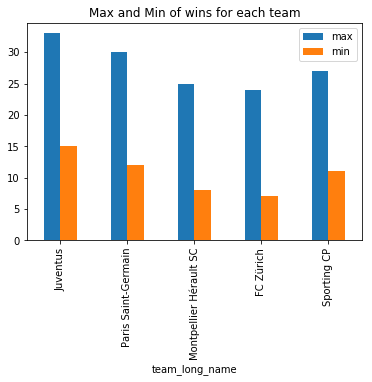

In [29]:
# plot max and wins in bar chart
df_match_cnt2.sort_values('diff',ascending=False).head(5).plot.bar(x='team_long_name',y=['max','min'],title='Max and Min of wins for each team')

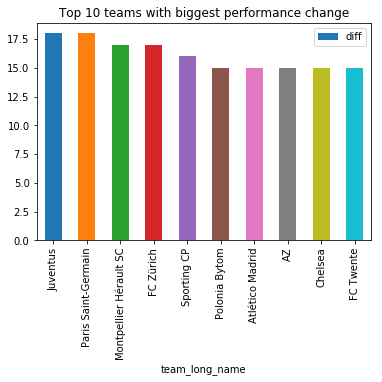

In [30]:
# plot diff of each teams
df_match_cnt2.sort_values(by='diff', ascending=False).head(10).plot.bar(x='team_long_name',y='diff',title='Top 10 teams with biggest performance change')

### Answer
> Team Juventus, Paris Saint-Germain, and SL Benfica have the biggest performance change, the difference between max and min of number of wins in each season over past period is bigger than that of other teams.

### Research Question 2:  Which players had the most penalties?
> Sum penalties by groupping dataset by player ID

In [31]:
# sum penalties by groupping dataset by player ID
df_player_penalty=df_player_att.groupby(by=['player_api_id'])['penalties'].sum().reset_index()
df_player_penalty.sort_values('penalties',ascending=False).head(5)

,player_api_id,penalties
4087,41269,4314.0
5808,108808,4120.0
4247,41890,3984.0
1327,26472,3813.0
1029,25772,3799.0


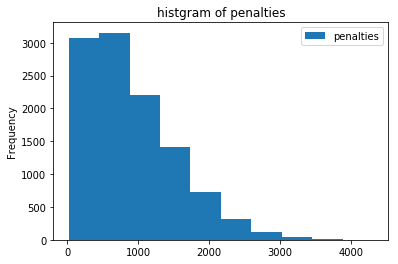

In [32]:
# plot histgram chart of penalities to view the data distribution
df_player_penalty.plot.hist(y='penalties',title='histgram of penalties')

In [33]:
# few players have penalities more than 4000, select players with penalties more than 4000
df_player_penalty.query('penalties>4000',inplace=True)
df_player_penalty.head(1)

,player_api_id,penalties
4087,41269,4314.0


In [34]:
# join df_player to get player name
df_player_penalty_name = df_player_penalty.merge(df_player, how='inner',on='player_api_id')
df_player_penalty_name.loc[:,('player_api_id','player_name','penalties')].sort_values('penalties',ascending=False)

,player_api_id,player_name,penalties
0,41269,Alessio Cerci,4314.0
1,108808,Mario Balotelli,4120.0


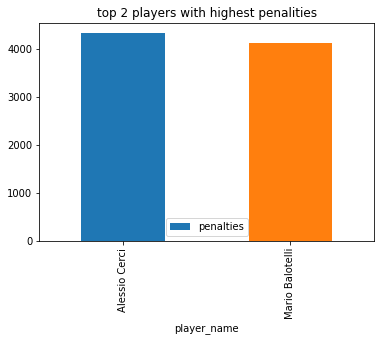

In [35]:
# plot in bar chart
df_player_penalty_name.plot.bar(x='player_name',y='penalties',title='top 2 players with highest penalities')

### Answer
> Player Alessio Cerci has the most penalities over past several years.

### Research Question 3:  Among three personality attributes: potential,stamina,agreesion, which player attributes lead to the hgiher overall rating ?
> Find correlation between overall rating and the three player attributes by plotting scater graphs

In [36]:
# view player attribute data
df_player_att.head(1)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,stamina,aggression,penalties
0,1,218353,505942,67.0,71.0,54.0,71.0,48.0


In [37]:
# trim dataset to drop unwanted columns
df_player_att.drop(['id','player_fifa_api_id','player_api_id','penalties'],axis=1,inplace=True)
df_player_att.head(1)

,overall_rating,potential,stamina,aggression
0,67.0,71.0,54.0,71.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bb482c2b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1bb41cfcc0>]], dtype=object)

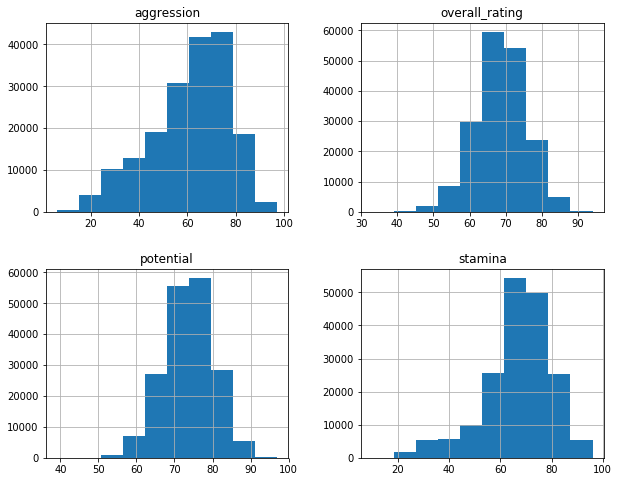

In [38]:
# view distribution of data
df_player_att.hist(figsize=(10,8))

Text(0.5,1,'overall rating and potential')

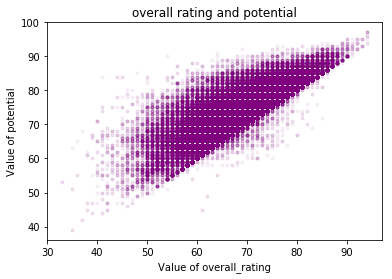

In [39]:
# plot overall_rating and potential to see if there is correlation between the two factors
# Plot with transparency
plt.plot( 'overall_rating', 'potential', data=df_player_att, linestyle='', marker='o', markersize=3, alpha=0.05, color="purple")
 
# Titles
plt.xlabel('Value of overall_rating')
plt.ylabel('Value of potential')
plt.title('overall rating and potential')

Text(0.5,1,'overall rating and stamina')

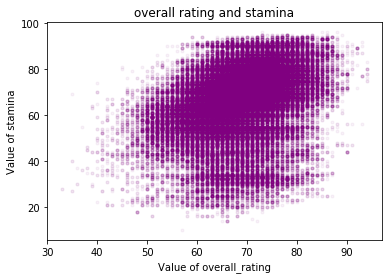

In [40]:
# plot overall_rating and stamina to see if there is correlation between the two factors
# Plot with transparency
plt.plot( 'overall_rating', 'stamina', data=df_player_att, linestyle='', marker='o', markersize=3, alpha=0.05, color="purple")
 
# Titles
plt.xlabel('Value of overall_rating')
plt.ylabel('Value of stamina')
plt.title('overall rating and stamina')

Text(0.5,1,'overall rating and aggression')

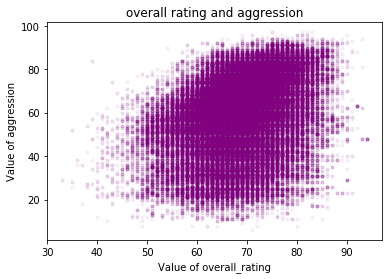

In [41]:
# plot overall_rating and aggression to see if there is correlation between the two factors
# Plot with transparency
plt.plot( 'overall_rating', 'aggression', data=df_player_att, linestyle='', marker='o', markersize=3, alpha=0.05, color="purple")
 
# Titles
plt.xlabel('Value of overall_rating')
plt.ylabel('Value of aggression')
plt.title('overall rating and aggression')


### Answer
> - The correlation between potential and overall rating is very strong, suggesting that potential is a key contributing factor for player's overall rating. 
> - The correlation between stamina and overall rating is postive but not strong, suggesting that stamina factor should be used cautiously when evaluating player's overall rating. 
> - The correlation between aggression and overall rating is postive but not strong, suggesting that aggresion factor should be used cautiously when evaluating player's overall rating

<a id='conclusions'></a>
## Conclusions

1. Team Juventus, Paris Saint-Germain, and SL Benfica  have the biggest performance change, the difference between max and min of number of wins in each season over past period is bigger than that of other teams.

2. Over the past several years, Player Alessio Cerci has the most penalities. 

3. Among three personality attributes: potential, stamina, agreesion, Potential is a strong factor in evaluating player's overall rating. However, this study did not explore underlying contributors of potential and did not exhaust other factors correlation with potential,so further studies are required.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0